![machine learnia](logo_machine_learnia.jpg)    
# Régression linéaire polynômiales
### Machine learnia

### Pour faire simple, on récupère le fichier sur la [régression linéaire simple](ml_regression_lineaire_simple.ipynb) et on va changer le contenu de la matrice x et de la matrice theta

In [12]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

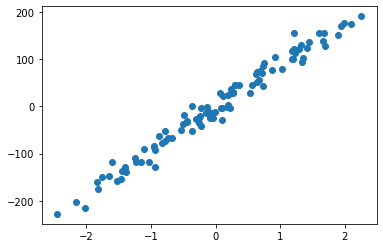

In [27]:
### Création dataset
x,y = make_regression(n_samples= 100, n_features= 2, noise= 10) # modèle linéaire avec 2 features
### afficher le dataset en nuage de points de la 1ère variable x1
plt.scatter(x[:, 0], y)

#### ! lorsqu'on utilise make.regression() les données de "y" sont incomplètes : donc réecrire les dimensions de "y"

In [28]:
# vérifier les dimensions de la matrice 
print(x.shape)
# réecrire les dimensions en prenant le nombre de lignes qu'il y a dans "y" en appelant shape[0]
y = y.reshape(y.shape[0], 1) 
print(y.shape)

(100, 2)
(100, 1)


In [31]:
# matrice x, avec hstack qui permet de coller tous les vecteurs
# on colle les vecteur en rajoutant une colonne de biais "1" de la meme taille que x
X = np.hstack((x, np.ones((x.shape[0], 1))))
X.shape
print(X) # X = 100 lignes et 2 colonnes

[[-1.39694367  0.49600396  1.        ]
 [ 0.56443712 -0.19115302  1.        ]
 [-1.60712295  1.84999225  1.        ]
 [-1.24898091  1.89794815  1.        ]
 [-0.95148379 -1.11363943  1.        ]
 [-0.22178009 -1.4161643   1.        ]
 [ 0.10486249 -0.20005826  1.        ]
 [-0.8236093  -0.10744572  1.        ]
 [ 0.19427872 -0.10063799  1.        ]
 [-1.10148548  0.3827405   1.        ]
 [ 1.35744068 -1.40114353  1.        ]
 [ 0.11405614  0.63689729  1.        ]
 [ 0.29824528 -0.10627996  1.        ]
 [ 0.74534162  0.4098817   1.        ]
 [ 1.61080955  1.66398437  1.        ]
 [ 1.23675879  0.14752288  1.        ]
 [ 0.64014879 -0.18204393  1.        ]
 [-1.47066293 -2.24751337  1.        ]
 [ 2.2588014  -0.71093932  1.        ]
 [-0.87744956  1.4245431   1.        ]
 [-0.23723923 -0.55561815  1.        ]
 [-0.01603033 -0.52597886  1.        ]
 [ 1.41285523 -0.18990323  1.        ]
 [-0.94243607 -1.55851036  1.        ]
 [ 0.24680048  1.1267948   1.        ]
 [ 0.26303874  1.00558758

In [33]:
# Générer theta avec des valeurs aléatoires
theta = np.random.randn(3, 1)
theta.shape # on verifie les dimensions
theta

array([[-1.46386817],
       [ 0.67383178],
       [-1.18521889]])

## Modèle linéaire

In [34]:
def model(X, theta):
    return X.dot(theta) # retourne le produit matriciel de X theta

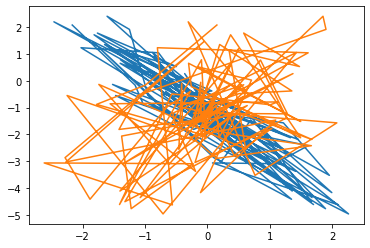

In [45]:
# afficher avec matplotlib le resultat du modèle par rapport au dataset X
plt.plot(x, model(X, theta))

## Fonction coût : erreur quadratique moyenne

In [36]:
def cost_fonction(X, y, theta):
    m = len(y)        # m représente le nombre d'exemple que l'on à dans le dataset, m = à la longueur du vecteur y
    return 1/(2*m) * np.sum((model(X, theta) - y)**2) 
    # ² = à la différence entre notre model et notre y

## Gradients et Descente de gradient

In [37]:
# fonction gradient
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [38]:
# fonction descente de gradient
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations) # sert pour la courbe d'apprentissage)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_fonction(X, y, theta) # on enregistre le coût du modèle pour chaque itérations
    return theta, cost_history

## Machine Learning : Entraînement du modèle

In [39]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)
theta_final

array([[91.16980581],
       [11.68276415],
       [-1.40901104]])

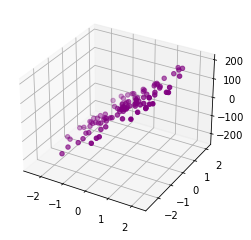

In [49]:
# vérification si le vecteur paramètre donne de bons résultats
predictions = model(X ,theta_final)
# plt.scatter(x[:,0], y)
# plt.scatter(x[:,0], predictions, c="purple")
ax = plt.axes(projection='3d') # Création d'un objet "axe 3D"
ax.scatter(x[:, 0], x[:, 1], predictions, c="purple")

## Courbe d'apprentissage
###### Voir si la machine apprend correctement

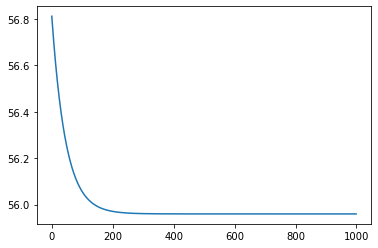

In [24]:
plt.plot(range(1000), cost_history)

## Coefficient de détermination
###### permet d'évaluer la performance de regression linéaire : méthode des moindres carrés
###### donc plus il est proche de 1 plus le modèle est bon

In [25]:
def coef_determination(y, pred):
    u =((y - pred)**2).sum()    # u = residu de la somme des carrées
    v = ((y - y.mean())**2).sum()
    return 1 - u/v       # v = somme total des carrées

In [26]:
coef_determination(y , predictions)

0.04609950453957379